In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# packages to use
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Mini Project 3

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time. In this notebook, I will do the following:

a) Use visualization to interpret how the *rate of change* of the Black-Scholes **call option** price behaves as time progresses.

b) Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

c) Repeat parts **a** and **b** for **put option** prices.

d) Record my observations and reflections based on the generated plots.

In [3]:
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

In [4]:
def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

### Call Option – Time Sensitivity

In [5]:
# black-scholes call time sensitivity
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 100) #times from 1 month to 5 years away

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
ddt_call_prices = np.gradient(call_prices,times)

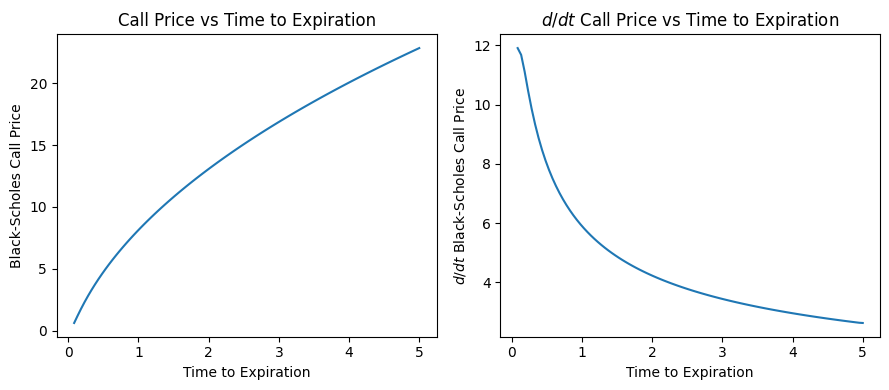

In [6]:
# --- create a 1-row, 2-column figure ---
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False)

# --- left subplot ---
axs[0].plot(times, call_prices)
axs[0].set_title('Call Price vs Time to Expiration')
axs[0].set_xlabel('Time to Expiration')
axs[0].set_ylabel('Black-Scholes Call Price')

# --- right subplot ---
axs[1].plot(times, ddt_call_prices)
axs[1].set_title('$d/dt$ Call Price vs Time to Expiration')
axs[1].set_xlabel('Time to Expiration')
axs[1].set_ylabel('$d/dt$ Black-Scholes Call Price')

plt.tight_layout()
plt.show()

### Observations:
- #### Call Option – Time Sensitivity:
    - As the time to expiration (x-axis in plot below) increases, the value of the Black-Scholes call option increases. This makes sense intuitively -- longer time to expiration means the stock has more oppurtinity to grow larger, thus the value of the option is higher. For small times to expiration (i.e., time less than 1 in the plot below), the rate at which the value of the call option increases for one small increase in expiration time is large. For larger times to expiration (i.e., time ~4-5 in the plot below), the rate at which the value of the option increases for another small increase in expiration time isn't quite as large, the curve begins to flatten out. At these large expiration times a small increase in time adds less incremental value relative to short times. Therefore, the rate of increase of the call option price decelerates over time and is thus concave down: as time to expiration increases, the call option price increases but at a decreasing rate (as shown in the derivative plot).

### Call Option – Spot Price Sensitivity

In [7]:
# black-scholes call spot price sensitivity
S0_vals = np.linspace(50, 150, 100)
K = 100
call_prices_vs_S = [bs_call(S0i, K, sigma, t=1) for S0i in S0_vals]
ddS_call_prices_vs_S = np.gradient(call_prices_vs_S, S0_vals)

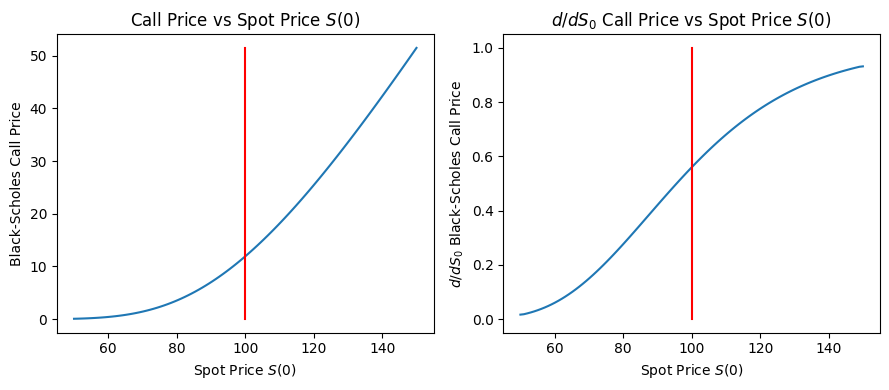

In [8]:
# --- create a 1-row, 2-column figure ---
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False)

# --- left subplot ---
axs[0].plot(S0_vals, call_prices_vs_S)
axs[0].plot([K,K],[0,max(call_prices_vs_S)],c='r')
axs[0].set_title('Call Price vs Spot Price $S(0)$')
axs[0].set_xlabel('Spot Price $S(0)$')
axs[0].set_ylabel('Black-Scholes Call Price')

# --- right subplot ---
axs[1].plot(S0_vals, ddS_call_prices_vs_S)
axs[1].plot([K,K],[0,1],c='r')
axs[1].set_title('$d/dS_0$ Call Price vs Spot Price $S(0)$')
axs[1].set_xlabel('Spot Price $S(0)$')
axs[1].set_ylabel('$d/dS_0$ Black-Scholes Call Price')

plt.tight_layout()
plt.show()

### Observations:
- #### Call Option – Spot Price Sensitivity:
    - For this analysis, I leave the strike price $K$ fixed at 100 and vary $S_0$ from 50 to 150. The value of the call option here depends on whether you're 'in the money' or 'out of the money'. For low $S_0$, this call option is not very valuable because it's unlikely that the stock climbs higher than the already high call price. On the other hand, for large $S_0$, this call option is valuable because the holder has the right to buy the stock at a price $K$ that is well below the current market value. Overall, as $S_0$ increases, the payoff $max( S_0-K,0 )$ becomes larger, and so the call option price increases. The rate, however, at which the value of the contract increases with $S_0$ is nonlinear (it follows a sigmoid shape in the derivative plot): when $S_0$ is low, the change in the value of the contract is small for incremental increases of $S_0$, however, when $S_0$ is large, the change in the value of the contract approaches 1 because with each added value to $S_0$ your payout $max( S_0-K,0 )$ increases by that amount also.

### Put Option – Time Sensitivity

In [9]:
# black-scholes put time sensitivity
S0 = 110
K = 100
sigma = .3
times = np.linspace(1/12, 5, 100)

put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
ddt_put_prices = np.gradient(put_prices, times)

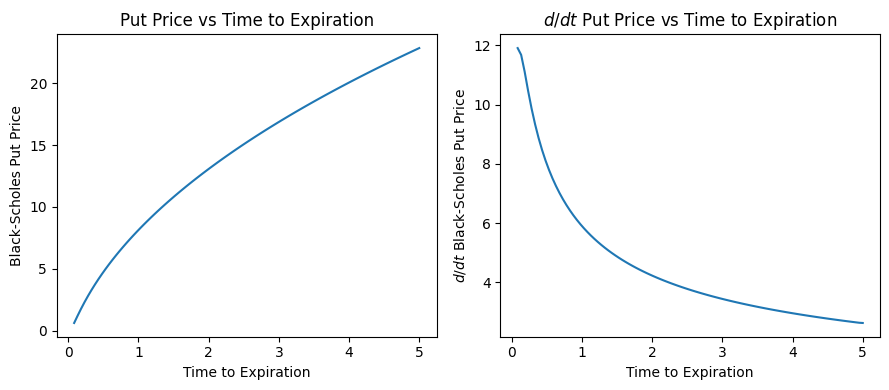

In [10]:
# --- create a 1-row, 2-column figure ---
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False)

# --- left subplot ---
axs[0].plot(times, put_prices)
axs[0].set_title('Put Price vs Time to Expiration')
axs[0].set_xlabel('Time to Expiration')
axs[0].set_ylabel('Black-Scholes Put Price')

# --- right subplot ---
axs[1].plot(times, ddt_put_prices)
axs[1].set_title('$d/dt$ Put Price vs Time to Expiration')
axs[1].set_xlabel('Time to Expiration')
axs[1].set_ylabel('$d/dt$ Black-Scholes Put Price')

plt.tight_layout()
plt.show()

### Observations:
- #### Put Option – Time Sensitivity:
    - Similar to call options, the value of this contract decays as the time to expriation approaches. This makes sense as for large expiration times, there's more chance that the stock can fall below the strike price (and not so when the expiration time is small). When there's a lot of time left until expiration, the rate at which the value of the contract changes with respect to small changes in the time to expiration is overall small -- lengthening or shortening the time to expiration by a small amount has little effect on the value of the contract. However, for small times to expiration, small changes in the time to expiration has a large effect on the value of the contract (this can be seen clearly in the derivative plot).

### Put Option – Spot Price Sensitivity

In [11]:
# black-scholes put spot price sensitivity
S0_vals = np.linspace(50, 150, 100)
K = 100
put_prices_vs_S = [bs_put(S0i, K, sigma, t=1) for S0i in S0_vals]
ddS_put_prices_vs_S = np.gradient(put_prices_vs_S, S0_vals)

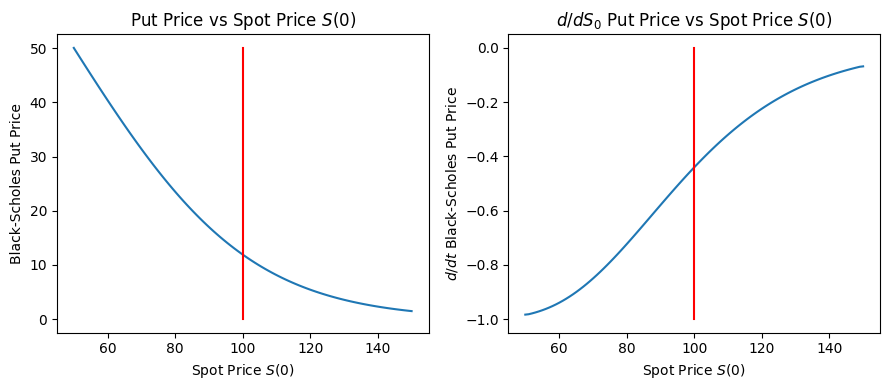

In [12]:
# --- create a 1-row, 2-column figure ---
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False)

# --- left subplot ---
axs[0].plot(S0_vals, put_prices_vs_S)
axs[0].plot([K,K],[0,max(put_prices_vs_S)],c='r')
axs[0].set_title('Put Price vs Spot Price $S(0)$')
axs[0].set_xlabel('Spot Price $S(0)$')
axs[0].set_ylabel('Black-Scholes Put Price')

# --- right subplot ---
axs[1].plot(S0_vals, ddS_put_prices_vs_S)
axs[1].plot([K,K],[-1,0],c='r')
axs[1].set_title('$d/dS_0$ Put Price vs Spot Price $S(0)$')
axs[1].set_xlabel('Spot Price $S(0)$')
axs[1].set_ylabel('$d/dt$ Black-Scholes Put Price')

plt.tight_layout()
plt.show()

### Observations:
- #### Put Option – Spot Price Sensitivity:
    - The value of the put option on spot price changes $S_0$ is the reverse of the call options behavior. For small spot prices (relative to strike price), the contract is very valuable (as you can quickly sell and collect profit). On the other hand, for large spot prices (relative to strike price), the contract isn't very valuable as its unlikely the stock price will fall below the strike price. In all cases, increasing the spot price by a little decreases the value of the contract. For low spot prices, the contract decreases in value linearly as profit is given by $max( K-S_0,0 )$ so increasing $S_0$ by a little linearly brings down the value of the contract. On the other end, for large spot prices, small changes in $S_0$ has little effect on how the value of the contract changes since the contract is already not too valuable in these cases.